In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df=pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/RELI Historical Data 2022-24.csv',  index_col='Date', parse_dates=True)


<ipython-input-10-2102530848>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df=pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/RELI Historical Data 2022-24.csv',  index_col='Date', parse_dates=True)


In [11]:
df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2024-12-31,"1,215.45","1,208.00","1,219.10","1,206.15",6.41M,0.39%
2024-12-30,"1,210.70","1,216.40","1,223.20","1,208.10",8.82M,-0.85%
2024-12-27,"1,221.05","1,218.30","1,227.90","1,217.00",7.00M,0.37%
2024-12-26,"1,216.55","1,224.25","1,227.70","1,214.25",10.02M,-0.51%
2024-12-24,"1,222.75","1,222.30","1,233.55","1,221.00",6.73M,0.04%


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 743 entries, 2024-12-31 to 2022-01-03
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Price     743 non-null    object
 1   Open      743 non-null    object
 2   High      743 non-null    object
 3   Low       743 non-null    object
 4   Vol.      743 non-null    object
 5   Change %  743 non-null    object
dtypes: object(6)
memory usage: 40.6+ KB


In [13]:
df=df.drop(['Vol.', 'Low', 'High', 'Open', 'Change %'], axis=1)
df=df.sort_index(ascending=True)
df['Price']=df['Price'].str.replace(',', '')
df['Price']=pd.to_numeric(df['Price'], errors='coerce')
df['return']=df['Price']/df['Price'].shift(1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 743 entries, 2022-01-03 to 2024-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   743 non-null    float64
 1   return  742 non-null    float64
dtypes: float64(2)
memory usage: 17.4 KB


In [15]:
df.head()

,Price,return
Date,,
2022-01-03,1091.18,NaN
2022-01-04,1115.80,1.022563
2022-01-05,1121.02,1.004678
2022-01-06,1096.92,0.978502
2022-01-07,1105.77,1.008068


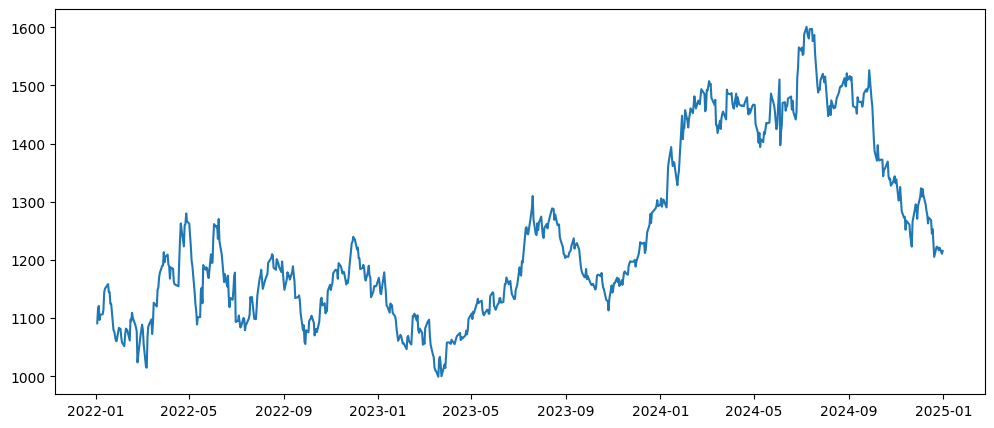

In [16]:
plt.figure(figsize=(12, 5))
plt.plot(df['Price'])

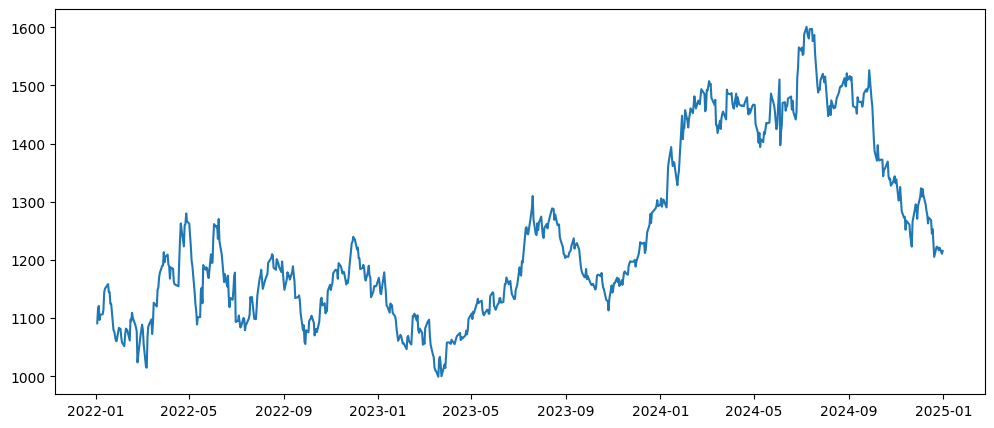

In [17]:
plt.figure(figsize=(12, 5))
plt.plot(df['Price'])

In [18]:
# check for stationarity

ret = df['return'].dropna()
from statsmodels.tsa.stattools import adfuller
result=adfuller(ret)
print('p-value', result[1])

p-value 0.0


#MA model

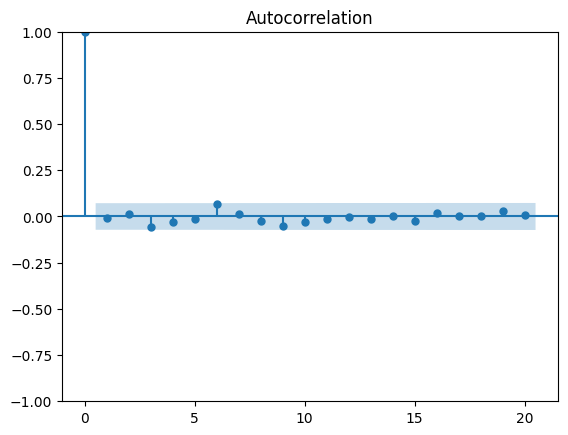

In [19]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plot_acf(ret, lags=20)
plt.show()

In [20]:
from statsmodels.tsa.arima.model import ARIMA

In [21]:
model=ARIMA(ret, order=(0,0,1))
result=model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


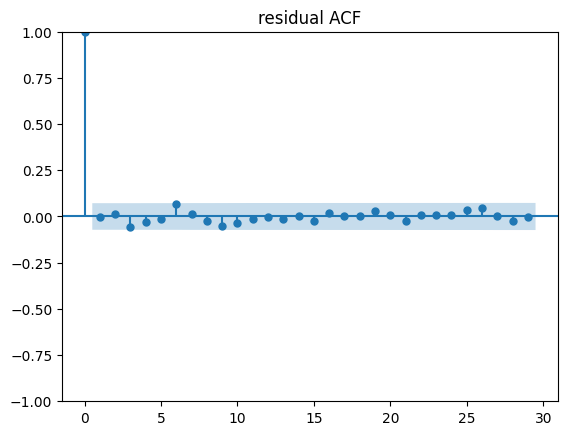

In [22]:
# the following code shows the error terms or white noise during fitting
residuals=result.resid
plot_acf(residuals)
plt.title("residual ACF")
plt.show()

In [35]:
df2=pd.read_csv('/content/drive/MyDrive/Datasets/RELI Historical Data jan-may 2025.csv', index_col='Date', parse_dates=True)
df2=df2.drop(['Vol.', 'Low', 'High', 'Open', 'Change %'], axis=1)
df2=df2.sort_index(ascending=True)
df2['Price']=df2['Price'].str.replace(',', '')
df2['Price']=pd.to_numeric(df2['Price'], errors='coerce')
df2['return']=df2['Price']/df2['Price'].shift(1)

df2.iloc[0, df2.columns.get_loc('return')] = df2['Price'].iloc[0] / df['Price'].iloc[-1]

<ipython-input-35-4098918922>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df2=pd.read_csv('/content/drive/MyDrive/Datasets/RELI Historical Data jan-may 2025.csv', index_col='Date', parse_dates=True)


In [36]:
df2

,Price,return
Date,,
2025-01-01,1221.25,1.004772
2025-01-02,1241.80,1.016827
2025-01-03,1251.15,1.007529
2025-01-06,1218.00,0.973504
2025-01-07,1240.85,1.018760
...,...,...
2025-05-26,1434.80,1.005607
2025-05-27,1422.10,0.991149
2025-05-28,1412.90,0.993531


In [37]:
df2=df2.dropna()

In [38]:
n_forecast=len(df2)

In [39]:
forecasted_returns=result.forecast(steps=n_forecast)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [43]:
len(forecasted_returns)

102

In [50]:
last_price = df['Price'].iloc[-1]
predicted_prices = [last_price]

for r in forecasted_returns:
    next_price = predicted_prices[-1] * r
    predicted_prices.append(next_price)


In [52]:
predicted_prices.pop(0)

np.float64(1215.45)

df3 for predicted price using MA

In [54]:
df3=pd.DataFrame(index=df2.index)
df3['Pred_price']=predicted_prices
df3['Pred_return']=forecasted_returns.values


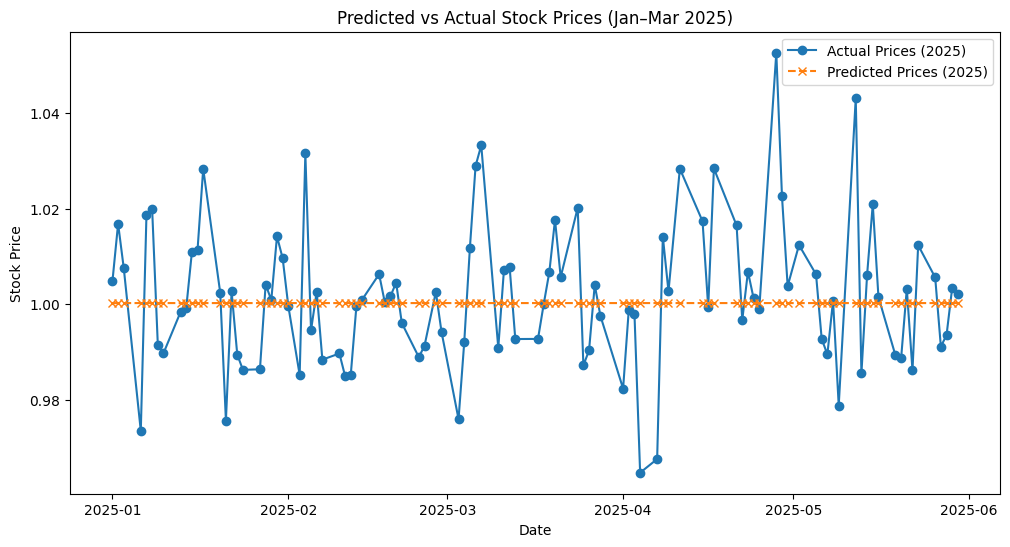

In [100]:
plt.figure(figsize=(12, 6))
plt.plot(df2.index, df2['return'], label='Actual Prices (2025)', marker='o')
plt.plot(df3.index, df3['Pred_return'], label='Predicted Prices (2025)', linestyle='--', marker='x')
plt.title('Predicted vs Actual Stock Prices (Jan–Mar 2025)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

#Predicting using AR model
For predicting using AR model, we already have df and df2 prepared, we just need to find the p in AR(p) model and train it accordingly.
For Finding q in MA(q) we used ACF, for p in AR(p) we will use PACF plots.

to try multiple values for p, use the one that minimizes AIC or BIC.

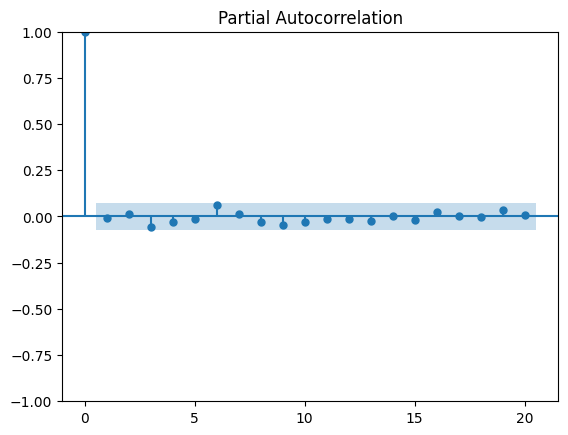

In [61]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(ret, lags=20)
plt.show()

In [62]:
model=ARIMA(ret, order=(1,0,0))
result_ar=model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


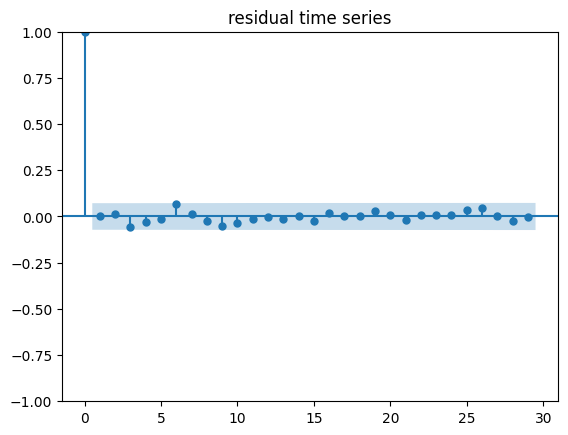

In [64]:
residuals=result.resid
plot_acf(residuals)
plt.title('residual time series')
plt.show()

In [65]:
forecasted_returns_ar=result_ar.forecast(steps=n_forecast)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [66]:
last_price_ar = df['Price'].iloc[-1]
predicted_prices_ar = [last_price_ar]

for r in forecasted_returns_ar:
    next_price_ar = predicted_prices_ar[-1] * r
    predicted_prices_ar.append(next_price_ar)


In [67]:
predicted_prices_ar.pop(0)

np.float64(1215.45)

In [71]:
predicted_prices_ar

[np.float64(1215.7186484857498),
 np.float64(1216.0142628744845),
 np.float64(1216.3097882606319),
 np.float64(1216.605386429679),
 np.float64(1216.9010564318085),
 np.float64(1217.1967982902631),
 np.float64(1217.4926120224711),
 np.float64(1217.7884976459004),
 np.float64(1218.0844551780224),
 np.float64(1218.380484636313),
 np.float64(1218.6765860382523),
 np.float64(1218.9727594013245),
 np.float64(1219.2690047430187),
 np.float64(1219.5653220808274),
 np.float64(1219.8617114322478),
 np.float64(1220.1581728147814),
 np.float64(1220.4547062459337),
 np.float64(1220.7513117432145),
 np.float64(1221.0479893241381),
 np.float64(1221.3447390062229),
 np.float64(1221.6415608069913),
 np.float64(1221.9384547439704),
 np.float64(1222.2354208346915),
 np.float64(1222.5324590966898),
 np.float64(1222.8295695475051),
 np.float64(1223.1267522046812),
 np.float64(1223.4240070857666),
 np.float64(1223.7213342083135),
 np.float64(1224.0187335898788),
 np.float64(1224.3162052480236),
 np.float64(

In [68]:
df3_ar=pd.DataFrame(index=df2.index)
df3_ar['Pred_price']=predicted_prices_ar
df3_ar['Pred_return']=forecasted_returns_ar.values

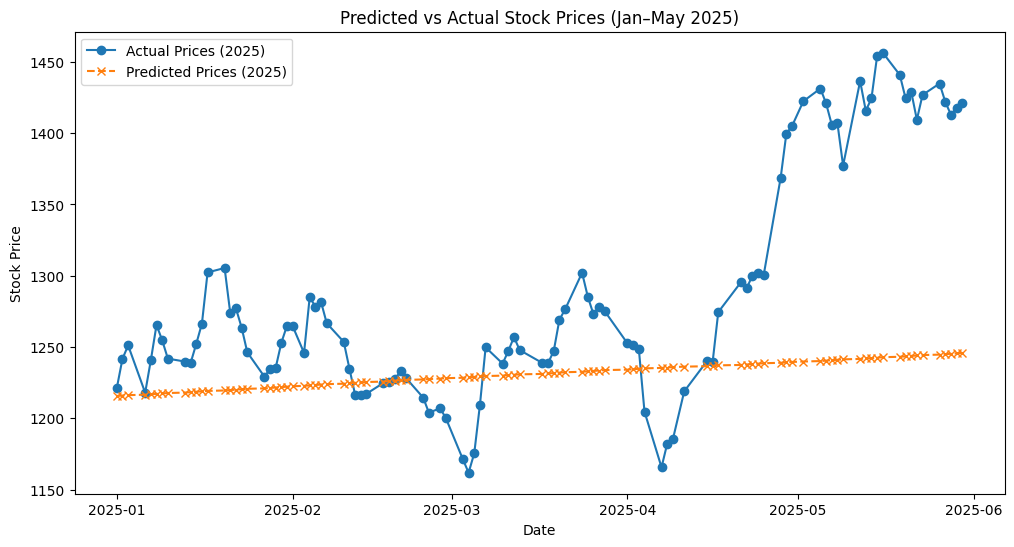

In [86]:
plt.figure(figsize=(12, 6))
plt.plot( df2['Price'], label='Actual Prices (2025)', marker='o')
plt.plot( df3_ar['Pred_price'], label='Predicted Prices (2025)', linestyle='--', marker='x')
plt.title('Predicted vs Actual Stock Prices (Jan–May 2025)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

#ARMA Model

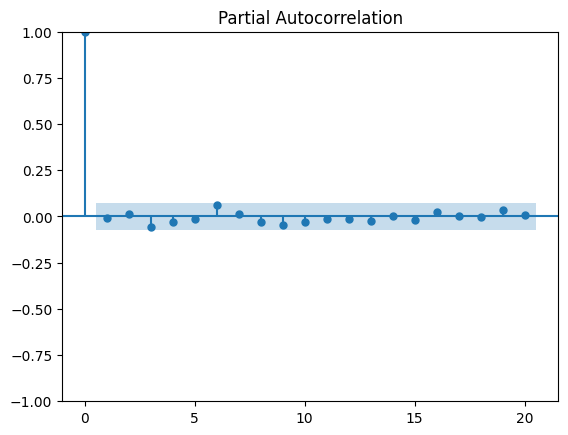

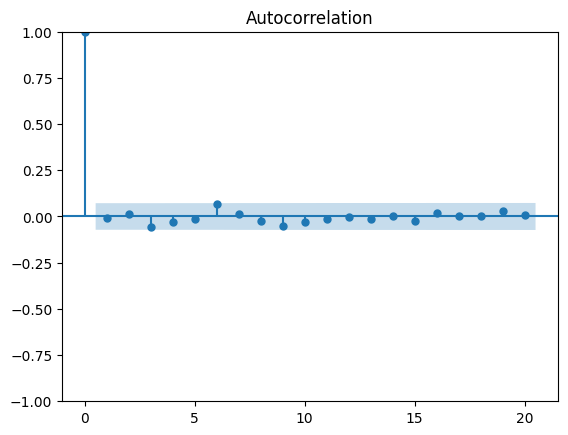

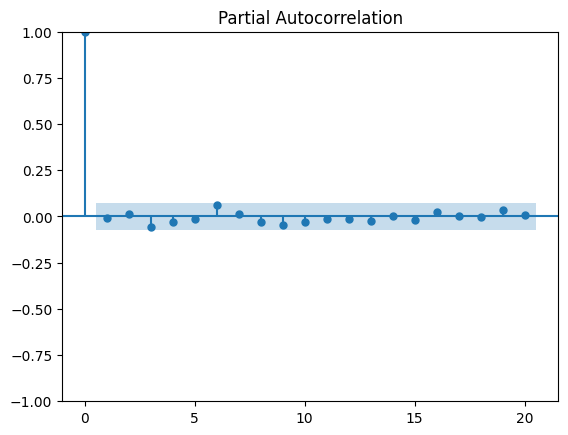

In [74]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ret, lags=20)
plot_pacf(ret, lags=20)

In [75]:
model=model=ARIMA(ret, order=(1,0,0))
result_arma=model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


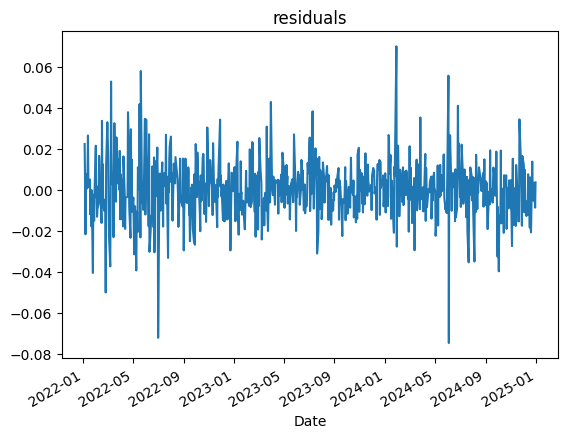

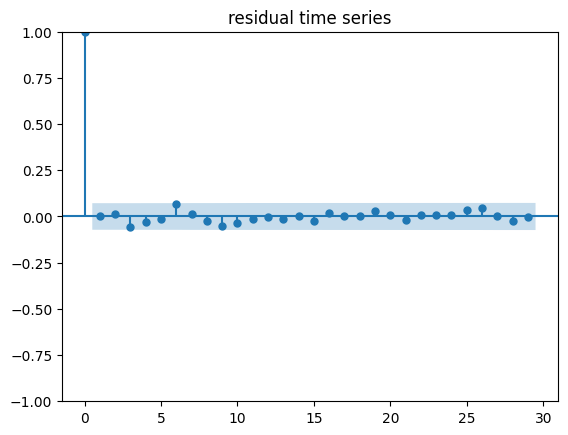

In [78]:
residuals=result_arma.resid
residuals.plot(title='residuals')
plot_acf(residuals)
plt.title('residual time series')
plt.show()

In [79]:
forecasted_returns_arma=result_arma.forecast(steps=n_forecast)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [80]:
last_price_arma = df['Price'].iloc[-1]
predicted_prices_arma = [last_price_arma]

for r in forecasted_returns_arma:
    next_price_arma = predicted_prices_arma[-1] * r
    predicted_prices_arma.append(next_price_arma)


In [81]:
predicted_prices_arma.pop(0)

np.float64(1215.45)

In [82]:
predicted_prices_arma

[np.float64(1215.7186484857498),
 np.float64(1216.0142628744845),
 np.float64(1216.3097882606319),
 np.float64(1216.605386429679),
 np.float64(1216.9010564318085),
 np.float64(1217.1967982902631),
 np.float64(1217.4926120224711),
 np.float64(1217.7884976459004),
 np.float64(1218.0844551780224),
 np.float64(1218.380484636313),
 np.float64(1218.6765860382523),
 np.float64(1218.9727594013245),
 np.float64(1219.2690047430187),
 np.float64(1219.5653220808274),
 np.float64(1219.8617114322478),
 np.float64(1220.1581728147814),
 np.float64(1220.4547062459337),
 np.float64(1220.7513117432145),
 np.float64(1221.0479893241381),
 np.float64(1221.3447390062229),
 np.float64(1221.6415608069913),
 np.float64(1221.9384547439704),
 np.float64(1222.2354208346915),
 np.float64(1222.5324590966898),
 np.float64(1222.8295695475051),
 np.float64(1223.1267522046812),
 np.float64(1223.4240070857666),
 np.float64(1223.7213342083135),
 np.float64(1224.0187335898788),
 np.float64(1224.3162052480236),
 np.float64(

In [83]:
df3_arma=pd.DataFrame(index=df2.index)
df3_arma['Pred_price']=predicted_prices_arma
df3_arma['Pred_return']=forecasted_returns_arma.values

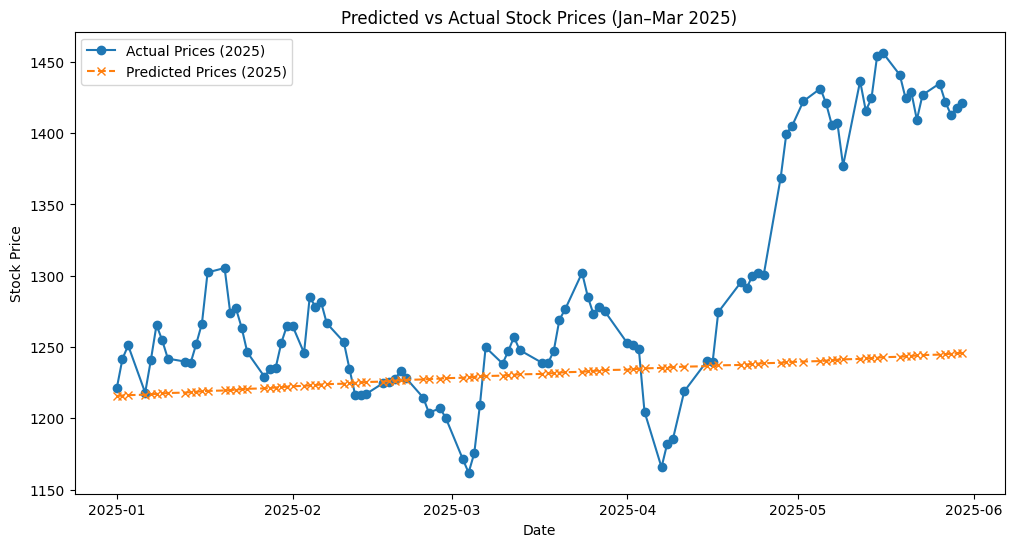

In [84]:
plt.figure(figsize=(12, 6))
plt.plot( df2['Price'], label='Actual Prices (2025)', marker='o')
plt.plot( df3_arma['Pred_price'], label='Predicted Prices (2025)', linestyle='--', marker='x')
plt.title('Predicted vs Actual Stock Prices (Jan–May 2025)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

#ARIMA Model

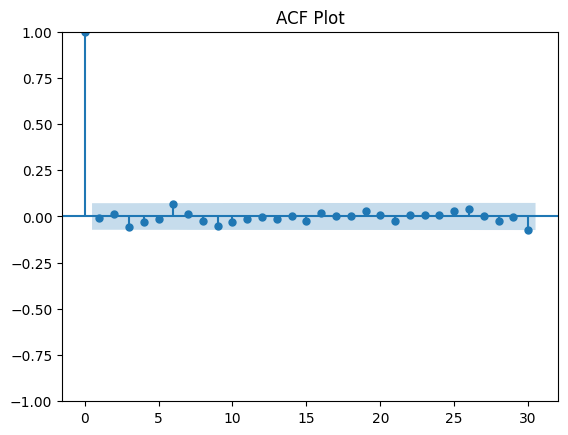

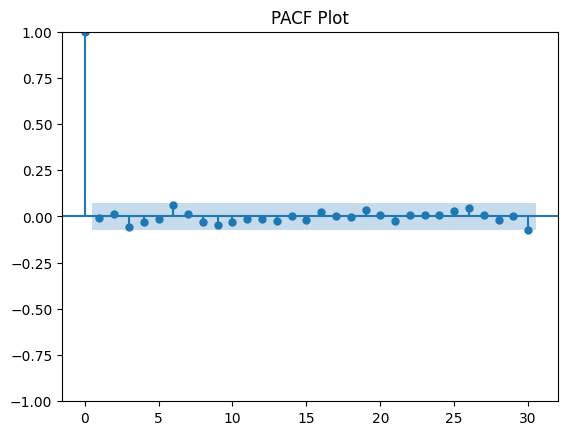

In [87]:
plot_acf(ret, lags=30)
plt.title("ACF Plot")
plt.show()

plot_pacf(ret, lags=30)
plt.title("PACF Plot")
plt.show()


In [88]:
model=ARIMA(ret, order=(1,0,1))
result_arima=model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

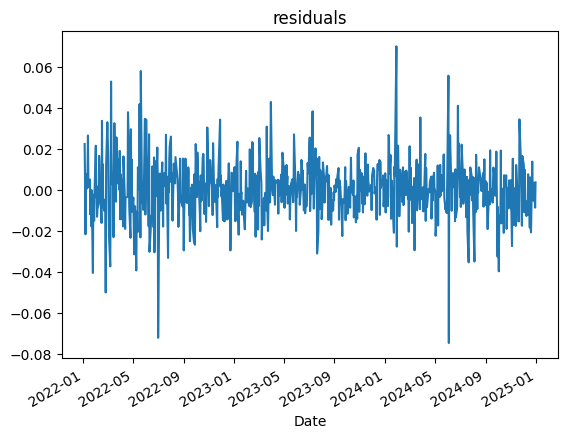

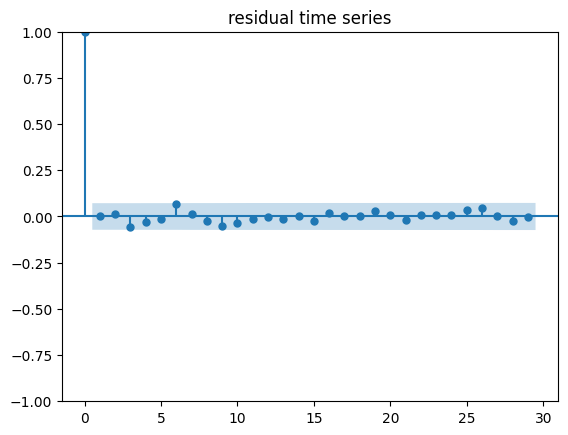

In [89]:
residuals=result_arma.resid
residuals.plot(title='residuals')
plot_acf(residuals)
plt.title('residual time series')
plt.show()

In [94]:
forecasted_returns_arima=result_arima.forecast(steps=n_forecast)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [95]:
last_price_arima = df['Price'].iloc[-1]
predicted_prices_arima = [last_price_arima]

for r in forecasted_returns_arima:
    next_price_arima = predicted_prices_arima[-1] * r
    predicted_prices_arima.append(next_price_arima)


In [96]:
predicted_prices_arima.pop(0)

np.float64(1215.45)

In [97]:
predicted_prices_arima

[np.float64(1215.7445465481496),
 np.float64(1216.0391753142467),
 np.float64(1216.3338754819338),
 np.float64(1216.628647068528),
 np.float64(1216.923490091337),
 np.float64(1217.2184045676734),
 np.float64(1217.5133905148532),
 np.float64(1217.8084479501972),
 np.float64(1218.1035768910301),
 np.float64(1218.3987773546808),
 np.float64(1218.6940493584823),
 np.float64(1218.9893929197722),
 np.float64(1219.2848080558917),
 np.float64(1219.580294784187),
 np.float64(1219.8758531220076),
 np.float64(1220.1714830867081),
 np.float64(1220.4671846956467),
 np.float64(1220.762957966186),
 np.float64(1221.0588029156925),
 np.float64(1221.3547195615374),
 np.float64(1221.650707921096),
 np.float64(1221.9467680117477),
 np.float64(1222.242899850876),
 np.float64(1222.5391034558688),
 np.float64(1222.8353788441182),
 np.float64(1223.1317260330202),
 np.float64(1223.4281450399756),
 np.float64(1223.7246358823888),
 np.float64(1224.0211985776689),
 np.float64(1224.317833143229),
 np.float64(1224.

In [98]:
df3_arima=pd.DataFrame(index=df2.index)
df3_arima['Pred_price']=predicted_prices_arima
df3_arima['Pred_return']=forecasted_returns_arima.values

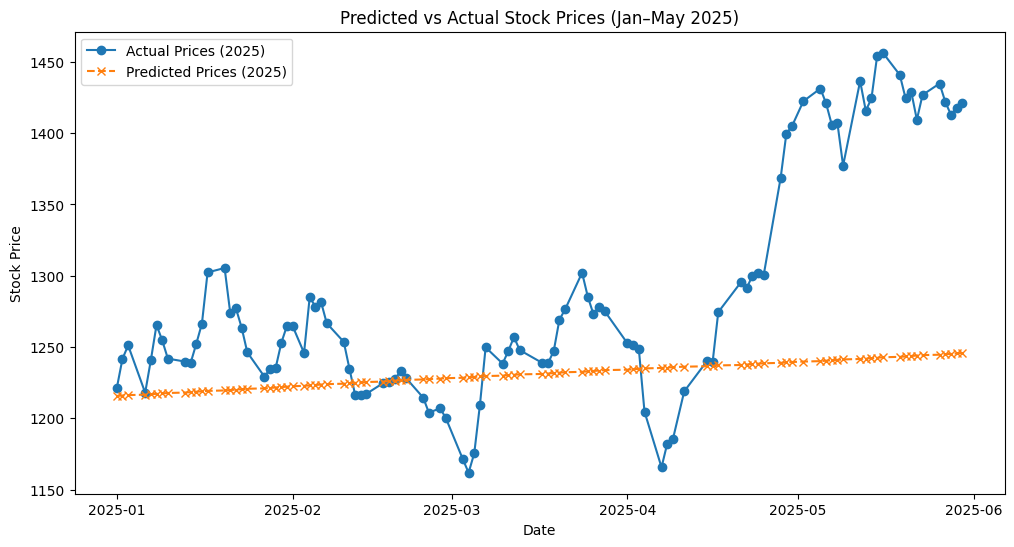

In [99]:
plt.figure(figsize=(12, 6))
plt.plot( df2['Price'], label='Actual Prices (2025)', marker='o')
plt.plot( df3_arima['Pred_price'], label='Predicted Prices (2025)', linestyle='--', marker='x')
plt.title('Predicted vs Actual Stock Prices (Jan–May 2025)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()